# Loss functions

Regressions model the relationship between predictors and dependent variables. But the relationship they are measuring and the process of "fitting" model is centered around the idea of loss functions.

The loss function is what is being optimized by the process of regression. Think of the term "loss function" sort of like the greater the value, the more information about your target variable that is "lost" by your model.

---

### Packages and data

Load, for now, the following data and packages.

The data is a subset of the football combine statistics you saw in a previous lecture. The concept of "train" and "test" datasets is going to repeatedly come up throughout the course. Imagine training data as the data you have now, and the test data as unobserved data which you validate the performance of your model on.

In [124]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [107]:
combine = pd.read_csv('combine_train.csv')

## Back to a simple linear model

Say we have a simple linear regression with a target variable $y$ and predictor variable $x$.

Linear regression solves for the "expected value" $E[y]$ (mean) of $y$ 

The $E[x]$ of y modeled with a coefficient $\beta_1$ times $x$ plus an intercept $\beta_0$:

### $$y = \beta_0+\beta_1x_1$$

---

### 1. Set up variables and build a regression predicting target from predictor

Again, your regression should just be a single target and single predictor for now.

You can choose any target and predictor that interests you, and you can subset the data if you like as well (subsetting on position, for example, is likely to improve a regression.)

You may use statsmodels or scikit-learn to build the regression:

    import statsmodels.api as sm
    from sklearn.linear_model import LinearRegression
    
Note that sklearn's regression expects your x variable to be a 2D matrix with rows, columns. See here:

http://stackoverflow.com/questions/30813044/sklearn-found-arrays-with-inconsistent-numbers-of-samples-when-calling-linearre

In [108]:
targets = pd.DataFrame(combine, columns=["PickTotal"])
df = pd.DataFrame(combine, columns=["Name",'Year','Position','Bench'])


In [109]:
x = df['Bench']
y = targets['PickTotal']

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

In [110]:
model.mse_model

11310656.113582496

---

## Least squares loss

As you may recall from yesterday, the most common loss function in linear regression is the **least squares loss** It is called least squared loss because it minimizes the sum of the squared errors/residuals.

### $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

This is called a **loss function**. The "loss" is considered the increasing sum of squared errors, which indicate a bad fit between predictors and outcome. We minimize the loss by finding the smallest sum.

---

### 2. Calculate the mean squared error for your regression and the baseline model

**Mean squared error** is just the mean of your squared errors. It is typically used as a metric in place of the sum of errors.

Either calculate the mean squared error for your regression and baseline model by hand, or use statsmodels/sklearn.

---

### 3. Plot the predictor vs. target and the predicted values vs. true values

Add the regression line and the baseline model line for the predictor vs. target chart.

Add a line that would pass through the origin with slope 1 on the values vs. true values chart.

What do the lines represent in each chart?

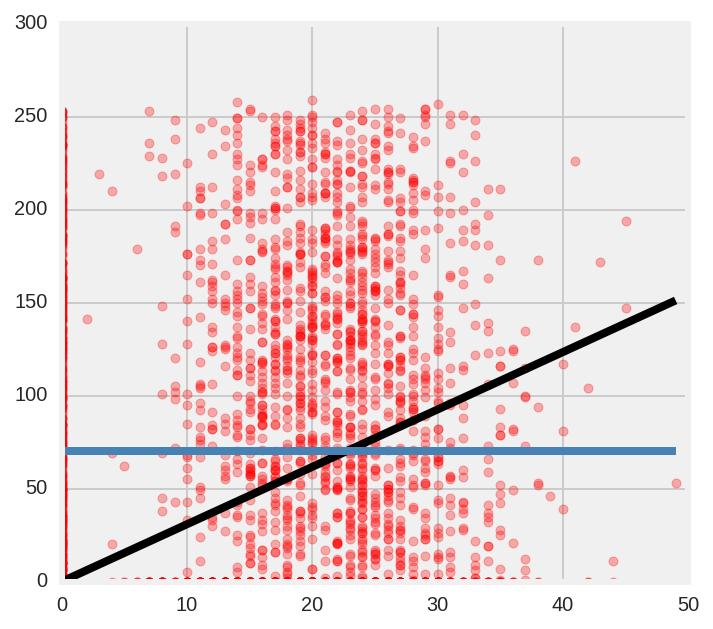

In [111]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.scatter(x,y,color='r',alpha=.3)
ax.plot([np.min(x),np.max(x)],[np.min(predictions),np.max(predictions)],color='black')
ax.plot([np.min(x),np.max(x)],[np.mean(y),np.mean(y)],color='steelblue')
plt.xlim(0,50)
plt.ylim(0,300)
plt.show()

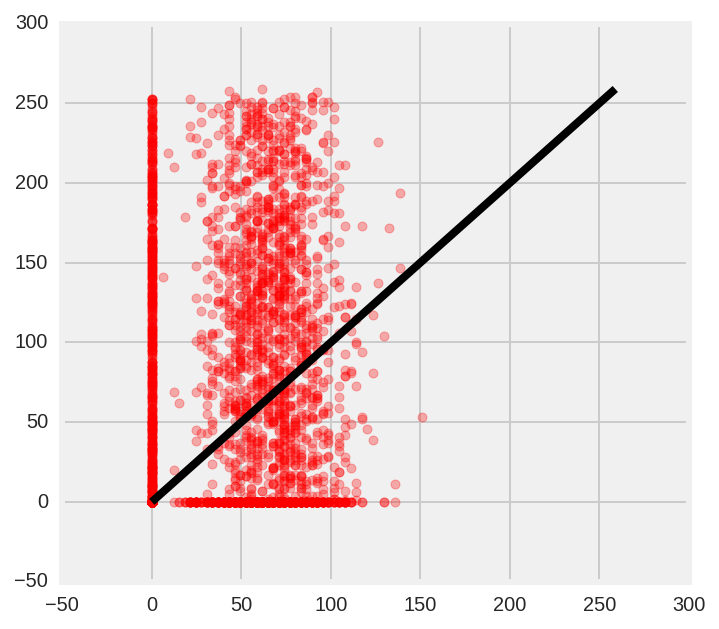

In [112]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.scatter(predictions,y,color='r',alpha=.3)
ax.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='black')
plt.show()

---

## $R^2$ of the regression

Recall that the $R^2$ metric calculates the variance explained by your model over the baseline model.

The formula, to refresh your memory, is:

### $$ R^2 = 1 - \frac{var(residuals)}{var(y)} $$

### 4. Calculate the $R^2$ either by hand or using sklearn or statsmodels

In [113]:
print model.rsquared_adj

0.311573344791


---

### 5. Remove outliers and build a non-outlier regression

Set a criteria for outliers that removes any value deviating more than 1.5 standard deviations from the mean. (Extremely strict).

Build a new regression with the non-outlier values.

In [114]:
rank_mask = (combine['PickTotal']<=1.5*np.std(combine['PickTotal']))&(combine['PickTotal']>=-1.5*np.std(combine['PickTotal']))
combine_adj = combine[rank_mask]
targets_adj = pd.DataFrame(combine_adj, columns=["PickTotal"])
df_adj = pd.DataFrame(combine_adj, columns=["Name",'Year','Position','Bench'])

x_adj = df_adj['Bench']
y_adj = targets_adj['PickTotal']

model_adj = sm.OLS(y_adj,x_adj).fit()
predictions_adj = model_adj.predict(x_adj)
print model_adj.mse_model

1210215.04313


---

### 6. Plot the regression with the outliers and without the outliers

Use the full data for both (not the data with outliers removed).

How do the regression lines change (if at all). Why?

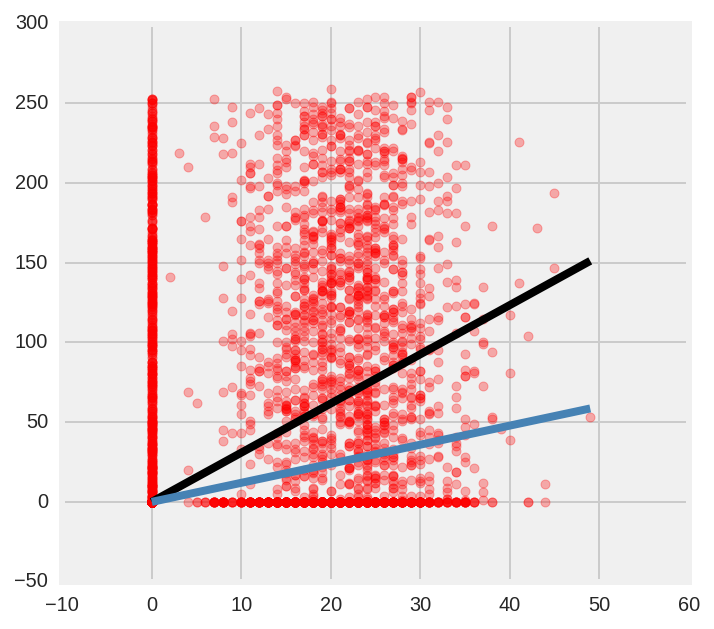

In [115]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.scatter(x,y,color='r',alpha=.3)
ax.plot([np.min(x),np.max(x)],[np.min(predictions),np.max(predictions)],color='black')
ax.plot([np.min(x),np.max(x)],[np.min(predictions_adj),np.max(predictions_adj)],color='steelblue')
# plt.xlim(0,50)
# plt.ylim(0,300)
plt.show()

---

### 7. Calculate the $R^2$ of your outlier-removed model and compare it to the original model

Which performs better? Why do you think that is?


In [116]:
print model.rsquared_adj
print model_adj.rsquared_adj

0.311573344791
0.257931177093


---

## Examining residuals

Looking at the residuals (errors) of your model is a good practice. Normally distributed residuals indicate that the assumptions of linear regression are probably being met, which in turn means that your regression is modeling the linear relationship appropriately.

### 8. Plot a histogram of the residuals from the original and no-outlier model

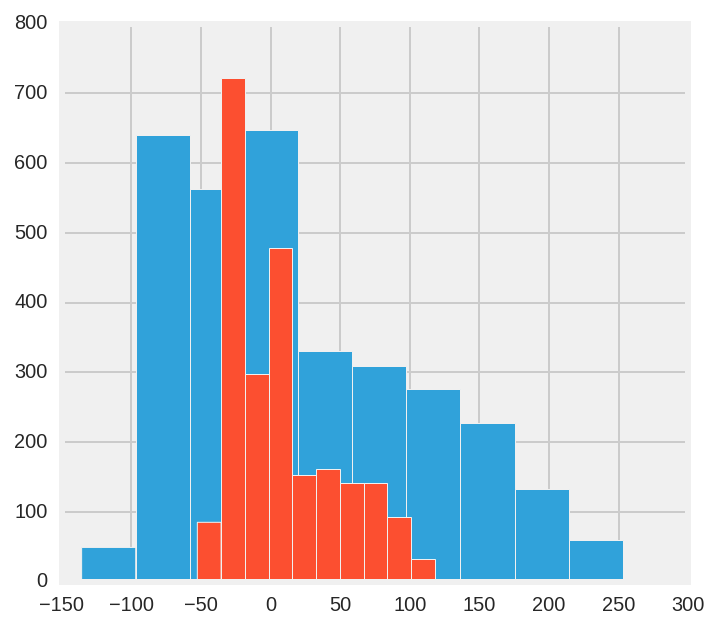

In [117]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.hist(model.resid)
ax.hist(model_adj.resid)
plt.show()

---

## Validating the model against a test set

Load in the test set file for the combine data. Pull out the corresponding target and predictor variables for the test set.

It is best practice after you build a model to, if possible, validate it against held out data. If it performs as well or nearly as well, you can be more sure that the model you've created is in fact making a correct inference about the linear relationship between variables for the overall population.

### 9. Get the $R^2$ value for your original model predicting values from the test data

Compare this to the $R^2$ on your training data.

In [118]:
combine_test = pd.read_csv('combine_test.csv')

In [142]:
lm = LinearRegression()

x = df[["Bench"]]
y = targets["PickTotal"]

model        =  lm.fit(x, y)
predictions  =  model.predict(x)
score        =  model.score(x, y)

print score

0.000679670079963


In [143]:
x_test = combine_test[['Bench']]
y_test = combine_test[['PickTotal']]

score_test = model.score(x_test,y_test)

print score_test

0.000729808077399


### 10. Calculate the mse for the test data and baseline model on test data

### 11. Plot the regression applied to test data against the test data baseline model

Look visually how it performs versus just guessing the mean of the target in the test data.
